In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('with_delta_data_raw.csv')
df.drop(['filename'],axis='columns',inplace=True)
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc_delta2_12,mfcc_delta2_13,mfcc_delta2_14,mfcc_delta2_15,mfcc_delta2_16,mfcc_delta2_17,mfcc_delta2_18,mfcc_delta2_19,mfcc_delta2_20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904013,6.622255,...,-0.005566,0.009769,0.026917,0.012235,-0.016079,-0.005081,-0.007982,0.005778,0.008250,not_covid
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.012802,-0.043971,-0.005800,0.003201,-0.001450,0.029343,0.033535,0.012024,-0.005233,not_covid
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,0.052410,0.022697,-0.035877,-0.008526,0.019751,0.110067,0.036322,-0.002662,0.011348,not_covid
3,0.407549,0.013452,2710.811637,2664.287550,5778.474935,0.142076,-346.857300,75.765617,-7.648193,11.362122,...,-0.025675,-0.019386,-0.022443,0.003590,0.007788,0.007400,-0.010279,-0.008092,0.003352,not_covid
4,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,0.003323,0.004976,0.006536,0.007962,0.009219,0.010272,0.011094,0.011664,0.011967,covid


In [4]:
data_train = df.sample(frac=0.8, random_state=1)          # 80% des données avec frac=0.8
data_test = df.drop(data_train.index)     # le reste des données pour le test

In [67]:
X_train = data_train.drop(['label'], axis=1)
y_train = data_train['label']
X_test = data_test.drop(['label'], axis=1)
y_test = data_test['label']

In [68]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)

[Text(627.75, 1514.3142857142857, 'mfcc_delta_7 <= -0.25\ngini = 0.196\nsamples = 136\nvalue = [15, 121]\nclass = not_covid'),
 Text(418.5, 1281.3428571428572, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = covid'),
 Text(837.0, 1281.3428571428572, 'mfcc6 <= 17.436\ngini = 0.153\nsamples = 132\nvalue = [11, 121]\nclass = not_covid'),
 Text(418.5, 1048.3714285714286, 'mfcc19 <= -12.702\ngini = 0.094\nsamples = 122\nvalue = [6, 116]\nclass = not_covid'),
 Text(209.25, 815.4, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = covid'),
 Text(627.75, 815.4, 'spectral_bandwidth <= 1919.158\ngini = 0.079\nsamples = 121\nvalue = [5, 116]\nclass = not_covid'),
 Text(418.5, 582.4285714285713, 'mfcc6 <= -0.566\ngini = 0.264\nsamples = 32\nvalue = [5, 27]\nclass = not_covid'),
 Text(209.25, 349.4571428571428, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = not_covid'),
 Text(627.75, 349.4571428571428, 'mfcc_delta_3 <= -0.015\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = covid'),
 Text(4

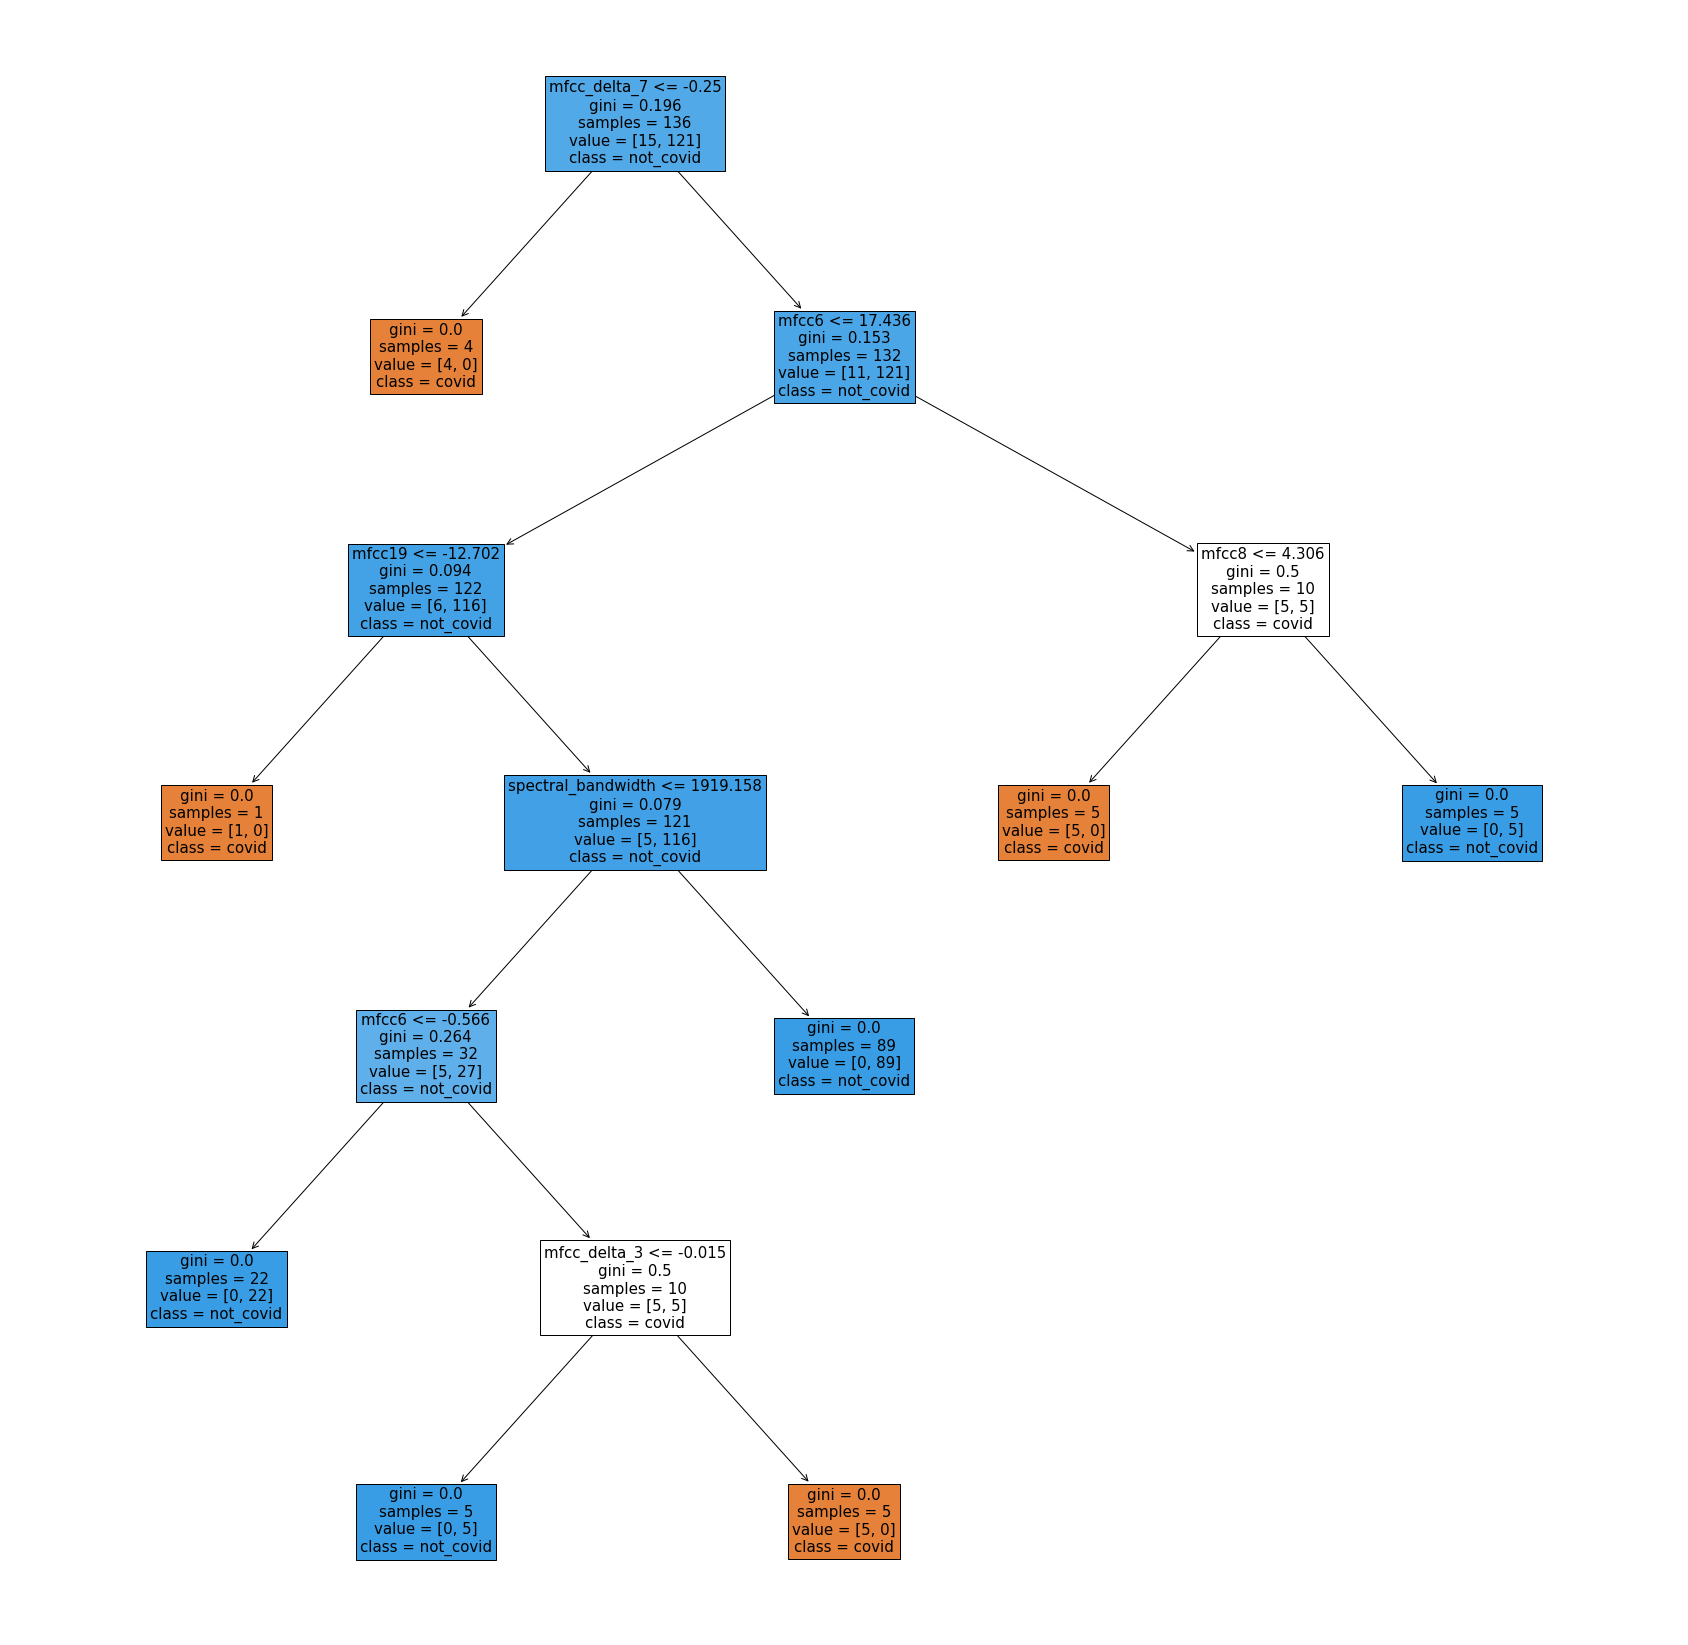

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(dtc, feature_names=X_train.columns, class_names=['covid','not_covid'], fontsize=15, filled=True)  